<a href="https://colab.research.google.com/github/janaeam/Shark_Attack_Data/blob/main/Shark_Attack_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
df = pd.read_excel('/content/drive/MyDrive/Coding Dojo/Week_7/Data/GSAF5.xls')

In [4]:
df.head()

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal (Y/N),Time,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23
0,2021.07.19,19-Jul-2021,2021.0,Unprovoked,AUSTRALIA,Western Australia,Rottnest Island,Surfing,male,M,NaN,"No injury, knocked off board by shark",N,12h30,"White shark, 3m","B. Myatt & S. De Marchi, GSAF",2021.07.19-Rottnest.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2021.07.19,2021.07.19,6668.0,NaN,NaN
1,2021.07.15,15-Jul-2021,2021.0,Unprovoked,USA,Florida,"New Smyrna Beach, Volusia County",Boogie boarding,male,M,11,Leg bitten,N,16h30,NaN,"K. McMurray, TrackingSharks.com",2021.07.15-NSB.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2021.07.15,2021.07.15,6667.0,NaN,NaN
2,2021.07.14,14-Jul-2021,2021.0,Unprovoked,SOUTH AFRICA,Eastern Cape Province,Jeffrey's Bay,Surfing,male,M,38,Injuries to leg and torso,N,07h07,NaN,"J. Marchard & M. Michaelson, GSAF",2021.07.14-Jbay.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2021.07.14,2021.07.14,6666.0,NaN,NaN
3,2021.07.11.R,Reported 11-Jul-2021,2021.0,Provoked,BAHAMAS,NaN,NaN,Jackass Team's publicity stunt for Discovery C...,Sean McInerney,M,NaN,Lacerations to right hand PROVOKED INCIDENT,N,NaN,NaN,"Yahoo.com, 7/11/2021",2021.07.11.R-McInerney.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2021.07.11.R,2021.07.11.R,6665.0,NaN,NaN
4,2021.07.10.c,10-Jul-2021,2021.0,Unprovoked,USA,Florida,"Bathtub Beach, Martin County",Playing,Amiya Lobb-Smith,F,9,Right foot bitten,N,16h39,"Spinner shark, 4'?","J. Marchand, GSAF",2021.07.10.c-Lobb-Smith.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2021.07.10.c,2021.07.10.c,6664.0,NaN,NaN


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25815 entries, 0 to 25814
Data columns (total 24 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Case Number             8793 non-null   object 
 1   Date                    6666 non-null   object 
 2   Year                    6665 non-null   float64
 3   Type                    6655 non-null   object 
 4   Country                 6617 non-null   object 
 5   Area                    6196 non-null   object 
 6   Location                6115 non-null   object 
 7   Activity                6104 non-null   object 
 8   Name                    6452 non-null   object 
 9   Sex                     6093 non-null   object 
 10  Age                     3744 non-null   object 
 11  Injury                  6635 non-null   object 
 12  Fatal (Y/N)             6115 non-null   object 
 13  Time                    3224 non-null   object 
 14  Species                 3669 non-null 

## df

- filter out empty columns and rows
- check for *NaN* values
- rename ***Case Number.1*** to ***Case Id*** to use as the index once EDA is completed and drop the remaining "Case" columns

In [6]:
df.columns

Index(['Case Number', 'Date', 'Year', 'Type', 'Country', 'Area', 'Location',
       'Activity', 'Name', 'Sex ', 'Age', 'Injury', 'Fatal (Y/N)', 'Time',
       'Species ', 'Investigator or Source', 'pdf', 'href formula', 'href',
       'Case Number.1', 'Case Number.2', 'original order', 'Unnamed: 22',
       'Unnamed: 23'],
      dtype='object')

In [7]:
# there are thousands of rows with no data I am going to delete those, but first
#    I need to find the end...
df[6665:6668]
# There 6,667 rows of active information

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal (Y/N),Time,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23
6665,ND.0002,1883-1889,0.0,Unprovoked,PANAMA,NaN,"Panama Bay 8ºN, 79ºW",NaN,Jules Patterson,M,NaN,FATAL,Y,NaN,NaN,"The Sun, 10/20/1938",ND-0002-JulesPatterson.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0002,ND.0002,3.0,NaN,NaN
6666,ND.0001,1845-1853,0.0,Unprovoked,CEYLON (SRI LANKA),Eastern Province,"Below the English fort, Trincomalee",Swimming,male,M,15,"FATAL. ""Shark bit him in half, carrying away t...",Y,NaN,NaN,S.W. Baker,ND-0001-Ceylon.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0001,ND.0001,2.0,NaN,NaN
6667,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
df = df[:6667]
df.tail(2)

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal (Y/N),Time,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23
6665,ND.0002,1883-1889,0.0,Unprovoked,PANAMA,NaN,"Panama Bay 8ºN, 79ºW",NaN,Jules Patterson,M,NaN,FATAL,Y,NaN,NaN,"The Sun, 10/20/1938",ND-0002-JulesPatterson.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0002,ND.0002,3.0,NaN,NaN
6666,ND.0001,1845-1853,0.0,Unprovoked,CEYLON (SRI LANKA),Eastern Province,"Below the English fort, Trincomalee",Swimming,male,M,15,"FATAL. ""Shark bit him in half, carrying away t...",Y,NaN,NaN,S.W. Baker,ND-0001-Ceylon.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0001,ND.0001,2.0,NaN,NaN


In [9]:
df.isnull().sum()

Case Number                  2
Date                         1
Year                         2
Type                        12
Country                     50
Area                       471
Location                   552
Activity                   563
Name                       215
Sex                        574
Age                       2923
Injury                      32
Fatal (Y/N)                552
Time                      3443
Species                   2998
Investigator or Source      18
pdf                          1
href formula                 4
href                         2
Case Number.1                1
Case Number.2                1
original order               0
Unnamed: 22               6666
Unnamed: 23               6665
dtype: int64

In [10]:
df['Case Number.1'] = df['Case Number.1'].fillna('2020.05.26')

In [11]:
df.rename(columns={'Case Number.1' : 'Case Id'}, inplace=True)

In [12]:
df = df.drop(columns=(['Case Number', 'Case Number.2', 'Unnamed: 22', 'Unnamed: 23']))

## Sharks

- filtering out obvious irrelevant columns by renaming dataframe to ***sharks***, leaving the original ***df*** for reference.

- fix value errors for ***Country*** column by ensuring capitalization and spelling consistency.

- fix ***Area*** and ***Location*** columns by ensuring the proper value is associated with the appropriate column. Some of the values are mixed between columns. Also, correct missing values by calling *Unkown* or *Unspecified*

- analayze the value_counts() and fill *NaN* values of the ***Date*** and ***Year*** columns

- analyze the value_counts() and correct inconsistencies of the ***Species*** and ***Fatal(Y/N)*** column

In [13]:
sharks = df.drop(columns=(['pdf', 'Name', 'href formula', 'href']))
sharks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6667 entries, 0 to 6666
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Date                    6666 non-null   object 
 1   Year                    6665 non-null   float64
 2   Type                    6655 non-null   object 
 3   Country                 6617 non-null   object 
 4   Area                    6196 non-null   object 
 5   Location                6115 non-null   object 
 6   Activity                6104 non-null   object 
 7   Sex                     6093 non-null   object 
 8   Age                     3744 non-null   object 
 9   Injury                  6635 non-null   object 
 10  Fatal (Y/N)             6115 non-null   object 
 11  Time                    3224 non-null   object 
 12  Species                 3669 non-null   object 
 13  Investigator or Source  6649 non-null   object 
 14  Case Id                 6667 non-null   

In [14]:
sharks.isnull().sum()

Date                         1
Year                         2
Type                        12
Country                     50
Area                       471
Location                   552
Activity                   563
Sex                        574
Age                       2923
Injury                      32
Fatal (Y/N)                552
Time                      3443
Species                   2998
Investigator or Source      18
Case Id                      0
original order               0
dtype: int64

In [15]:
sharks['Type'] = sharks['Type'].replace({'Unconfirmed' : 'Unverified',
                                         'Under investigation' : 'Unverified',
                                         'Questionable' : 'Unverified',
                                         'Boat' : 'Watercraft'}).fillna('Unverified')

In [16]:
sharks['Type'].value_counts()

Unprovoked      4885
Provoked         607
Invalid          552
Watercraft       356
Sea Disaster     240
Unverified        27
Name: Type, dtype: int64

In [17]:
sharks['Country'].nunique()

216

In [18]:
sharks['Country'] = sharks['Country'].replace({' PHILIPPINES' : 'PHILIPPINES',
                                               ' TONGA' : 'TONGA',
                                               'ASIA?' : 'ASIA',
                                               'ANDAMAN ISLANDS' : 'ANDAMAN AND NICOBAR ISLANDS',
                                               'ANDAMAN / NICOBAR ISLANDAS' : 'ANDAMAN AND NICOBAR ISLANDS',
                                               'BRITISH NEW GUINEA' : 'PAPUA NEW GUINEA',
                                               'Between PORTUGAL & INDIA' : 'ATLANTIC OCEAN',
                                               'CEYLON' : 'CEYLON (SRI LANKA)',
                                               'COLUMBIA' : 'COLOMBIA',
                                               'Coast of AFRICA' : 'SOUTH AFRICA',
                                               'EGYPT ' : 'EGYPT',
                                               'EGYPT / ISRAEL' : 'EGYPT',
                                               'EQUATORIAL GUINEA / CAMEROON' : 'NEW GUINEA',
                                               'GRAND CAYMAN' : 'CAYMAN ISLANDS',
                                               'INDIAN OCEAN?' : 'INDIAN OCEAN',
                                               'IRAN / IRAQ' : 'IRAN',
                                               'ITALY / CROATIA' : 'ITALY',
                                               'MALDIVE ISLANDS' : 'MALDIVES',
                                               'MEXICO ' : 'MEXICO',
                                               'MID ATLANTIC OCEAN' : 'ATLANTIC OCEAN',
                                               'MID-PACIFIC OCEAN' : 'PACIFIC OCEAN',
                                               'NICARAGUA ' : 'NICARAGUA',
                                               'NORTH ATLANTIC OCEAN ' : 'NORTH ATLANTIC OCEAN',
                                               'OCEAN' : 'OCEANIA',
                                               'PACIFIC OCEAN ' : 'PACIFIC OCEAN',
                                               'RED SEA / INDIAN OCEAN' : 'RED SEA',
                                               'RED SEA?' : 'RED SEA',
                                               'REUNION ISLAND' : 'REUNION',
                                               'SOLOMON ISLANDS / VANUATU' : 'SOLOMON ISLANDS',
                                               'SOUTH WEST PACIFIC OCEAN' : 'SOUTH PACIFIC OCEAN',
                                               'ST HELENA, British overseas territory' : 'ST HELENA',
                                               'ST KITTS / NEVIS' : 'ST KITTS',
                                               'ST MARTIN' : 'ST MAARTEN',
                                               'ST. MAARTIN' : 'ST MAARTEN',
                                               'ST. MARTIN' : 'ST MAARTEN',
                                               'SUDAN?' : 'SUDAN',
                                               'THE BALKANS' : 'BALKANS',
                                               'TRINIDAD & TOBAGO' : 'TOBAGO',
                                               'UNITED ARAB EMIRATES (UAE)' : 'UNITED ARAB EMIRATES',
                                               'BRITISH WEST INDIES' : 'WEST INDIES',
                                               'WESTERN SAMOA' : 'SAMOA',
                                               'Sierra Leone' : 'SIERRA LEONE',
                                               'Seychelles' : 'SEYCHELLES',
                                               'YEMEN ' : 'YEMEN'})

In [19]:
vc = sharks['Country'].value_counts()
vc.sort_index()[90:110]

MADAGASCAR               8
MALAYSIA                 5
MALDIVES                 3
MALTA                    5
MARSHALL ISLANDS        13
MARTINIQUE               3
MAURITIUS               10
MAYOTTE                  1
MEDITERRANEAN SEA        2
MEXICO                  96
MICRONESIA               3
MID-PACIFC OCEAN         1
MONACO                   1
MONTENEGRO               3
MOZAMBIQUE              46
NAMIBIA                  2
NETHERLANDS ANTILLES     1
NEVIS                    1
NEW BRITAIN              6
NEW CALEDONIA           62
Name: Country, dtype: int64

In [20]:
country = sharks.loc[sharks['Area']== 'California', :]
country[20:30]

,Date,Year,Type,Country,Area,Location,Activity,Sex,Age,Injury,Fatal (Y/N),Time,Species,Investigator or Source,Case Id,original order
404,24-Nov-2017,2017.0,Unprovoked,USA,California,"Stillwater Cove, Monterey County",Spearfishing,M,25,Right leg bitten,N,13h45,"White shark, 4.6 m","R. Collier, GSAF",2017.11.24,6264.0
450,01-Aug-2017,2017.0,Watercraft,USA,California,"Between Pescadero Point & Bean Hollow Beach, S...",Fishing,M,NaN,"No injury, bow of kayak bitten",N,10h45,"White shark, 10'","R. Collier, GSAF",2017.08.01,6218.0
461,20-Jul-2017,2017.0,Watercraft,USA,California,"Stearns Wharf, Santa Barbara",Kayaking,M,40,"No injury, kayak bitten",N,11h20,"White shark, 11' to 13'","R. Collier, GSAF",2017.07.20.b,6207.0
462,20-Jul-2017,2017.0,Unprovoked,USA,California,"Seal Rock, Goleta Beach, Santa Barbara",SUP,M,50,"No injury, shark bit paddleboard",N,07h45,"White shark, 8' to 10'","R. Collier, GSAF",2017/07.20.a,6206.0
465,11-Jul-2017,2017.0,Watercraft,USA,California,"Santa Cruz, Santa Cruz County",Kayaking,M,NaN,"No injury, kayak bitten",N,11h00,White shark,"R. Collier, GSAF",2017.07.11,6203.0
490,03-May-2017,2017.0,Invalid,USA,California,"Sunset Beach, Orange County",Surfing,F,18,"Laceration to thigh, likely caused by surfboar...",NaN,14h30,Shark involvement highly doubtful,"R. Collier, GSAF",2017.05.03,6178.0
491,29-Apr-2017,2017.0,Unprovoked,USA,California,"San Onofre, San Diego County",Swimming,F,NaN,Major injury to posterior thigh,N,17h34,NaN,"R. Collier, GSAF",2017.04.29.d,6177.0
514,18-Mar-2017,2017.0,Watercraft,USA,California,Monterey Bay,Kayaking,M,NaN,"No injury, kayak bitten",N,14h30,White shark,"R. Collier, GSAF",2017.03.18,6154.0
562,17-Sep-2016,2016.0,Unprovoked,USA,California,"Bunkers, Humboldt Bay, Eureka, Humboldt County",Surfing,M,43,"No injury, board bitten",N,After noon,NaN,"R. Collier, GSAF",2016.09.17.b,6106.0
572,01-Sep-2016,2016.0,Unprovoked,USA,California,"Refugio State Beach, Santa Barbara County",Spearfishing,M,22,Two toes broken & lacerated,N,NaN,"White shark, 8' to 10'","R. Collier, GSAF",2016.09.01,6096.0


In [21]:
sharks.loc[sharks['Location']== 'Santa Cruz', 'Country'] = sharks.loc[sharks['Location']== 'Santa Cruz', 'Country'].fillna('USA')
sharks.loc[sharks['Location']== 'Santa Cruz', 'Area'] = sharks.loc[sharks['Location']== 'Santa Cruz', 'Area'].fillna('California')

In [22]:
sharks.loc[sharks['original order']== 496, :] = sharks.loc[sharks['original order']== 496, :].replace('Santa Cruz','Santa Cruz, Santa Cruz County')

In [23]:
sharks.loc[sharks['Area']=='English Channel', 'Country'] = sharks.loc[sharks['Area']=='English Channel', 'Country'].fillna('ENGLAND')
sharks.loc[sharks['Location']=='Between St. Kitts & Nevis', ['Country', 'Area']] = sharks.loc[sharks['Location']=='Between St. Kitts & Nevis', ['Country', 'Area']].fillna('ST KITTS').replace('Caribbean Sea', 'The Narrows')
sharks.loc[sharks['Location']=='Florida Strait', 'Country'] = sharks.loc[sharks['Location']=='Florida Strait', 'Country'].fillna('USA')
sharks.loc[sharks['Location']=='Florida Strait', 'Area'] = sharks.loc[sharks['Location']=='Florida Strait', 'Area'].fillna('Florida')

In [24]:
sharks.loc[sharks['Area']=='Between Timor & Darwin, Australia', 'Country'] = sharks.loc[sharks['Area']=='Between Timor & Darwin, Australia', 'Country'].fillna('AUSTRALIA')
sharks.loc[sharks['Area']=='Between Timor & Darwin, Australia', 'Location'] = sharks.loc[sharks['Area']=='Between Timor & Darwin, Australia', 'Location'].fillna('Darwin')

In [25]:
sharks.loc[sharks['Area']=='Caribbean Sea', 'Country'] = sharks.loc[sharks['Area']=='Caribbean Sea', 'Country'].fillna('CARIBBEAN SEA')
sharks.loc[sharks['Area']=='Near the Andaman & Nicobar Islands', 'Country'] = sharks.loc[sharks['Area']=='Near the Andaman & Nicobar Islands', 'Country'].fillna('ANDAMAN AND NICOBAR ISLANDS')
sharks.loc[sharks['Area']=='Caribbean Sea', 'Country'] = sharks.loc[sharks['Area']=='Caribbean Sea', 'Country'].fillna('CARIBBEAN SEA')
sharks.loc[sharks['Area']=='Between Comores & Madagascar', 'Country'] = sharks.loc[sharks['Area']=='Between Comores & Madagascar', 'Country'].fillna('COMOROS')

In [26]:
sharks.loc[sharks['Location']=='225 miles east of Hong Kong', 'Country'] = sharks.loc[sharks['Location']=='225 miles east of Hong Kong', 'Country'].fillna('CHINA')
sharks.loc[sharks['Location']=='225 miles east of Hong Kong', 'Area'] = sharks.loc[sharks['Location']=='225 miles east of Hong Kong', 'Area'].fillna('Hong Kong')
sharks.loc[sharks['Area']== 'New Territories', :] = sharks.loc[sharks['Area']== 'New Territories', :].replace({'HONG KONG':'CHINA', 'New Territories':'Hong Kong'})
sharks.loc[sharks['Area']== 'Mirs Bay ', ['Area','Location', 'Country']] = sharks.loc[sharks['Area']== 'Mirs Bay ', ['Area','Location', 'Country']].replace({'HONG KONG':'CHINA','Mirs Bay ':'Hong Kong'}).fillna('Mirs Bay')
sharks.loc[sharks['Area']=='Ho Ha Wan Marine Park', 'Location'] = sharks.loc[sharks['Area']=='Ho Ha Wan Marine Park', 'Location'].fillna('Ho Ha Wan Marine Park')
sharks.loc[sharks['Area']=='South China Sea 200 miles from Hong Kong', 'Location'] = sharks.loc[sharks['Area']=='South China Sea 200 miles from Hong Kong', 'Location'].fillna('South China Sea 200 miles from Hong Kong')
sharks.loc[sharks['Country']=='HONG KONG', 'Area'] = sharks.loc[sharks['Country']=='HONG KONG', 'Area'].fillna('Hong Kong')
sharks.loc[sharks['Country']=='HONG KONG', ['Country', 'Area', 'Location']] = sharks.loc[sharks['Country']=='HONG KONG', ['Country', 'Area', 'Location']].replace({'HONG KONG':'CHINA', 
                                                                                                                                                                   'Clearwater Bay':'Hong Kong',
                                                                                                                                                                   'On the Kowloon penisula, south of Sai Kung':'Hong Kong',
                                                                                                                                                                   'Kowloon Peninsula':'Hong Kong',
                                                                                                                                                                   'Port Shelter':'Hong Kong',
                                                                                                                                                                   'Ho Ha Wan Marine Park': 'Hong Kong',
                                                                                                                                                                   'South China Sea 200 miles from Hong Kong':'Hong Kong',
                                                                                                                                                                   'First Beach':'Clearwater Bay First Beach',
                                                                                                                                                                   'Silverstrand':'Kowloon Peninsula, South of Sai Kung, Silverstrand',
                                                                                                                                                                   'Sai Kung':'Kowloon Peninsula, Sai Kung',
                                                                                                                                                                   'Silverstand Beach, near Hung Hau':'Port Shelter, Silverstrand Beach, near Hung Hau',
                                                                                                                                                                   })

In [27]:
sharks.loc[sharks['Country']=='CHINA', 'Area'] = sharks.loc[sharks['Country']=='CHINA', 'Area'].fillna('Macao')
sharks.loc[sharks['Location']=='Macao Harbor', 'Fatal (Y/N)'] = sharks.loc[sharks['Location']=='Macao Harbor', 'Fatal (Y/N)'].fillna('N')

In [28]:
sharks.loc[sharks['Location']=='In a river feeding into the Bay of Bengal', 'Country'] = sharks.loc[sharks['Location']=='In a river feeding into the Bay of Bengal', 'Country'].fillna('INDIA')
sharks.loc[sharks['Location']=='In a river feeding into the Bay of Bengal', 'Area'] = sharks.loc[sharks['Location']=='In a river feeding into the Bay of Bengal', 'Area'].fillna('Bay of Bengal')

In [29]:
sharks.loc[sharks['Area']=='Ionian Sea', 'Country'] = sharks.loc[sharks['Area']=='Ionian Sea', 'Country'].fillna('GREECE')

In [30]:
sharks.loc[sharks['Area']=='St Helena', 'Country'] = sharks.loc[sharks['Area']=='St Helena', 'Country'].fillna('SOUTH ATLANTIC OCEAN')

In [31]:
sharks.loc[sharks['Location']=='Carlisle Bay', 'Country'] = sharks.loc[sharks['Location']=='Carlisle Bay', 'Country'].fillna('ANTIGUA')


In [32]:
sharks.loc[sharks['Area']=='Western Banks', 'Country'] = sharks.loc[sharks['Area']=='Western Banks', 'Country'].fillna('USA')
sharks.loc[sharks['Area']=='Western Banks', ['Area', 'Location']] = sharks.loc[sharks['Area']=='Western Banks', ['Area', 'Location']].replace('Western Banks','Maine').fillna('Western Banks')
sharks.loc[sharks['Area']=='Gulf of California', 'Country'] = sharks.loc[sharks['Area']=='Gulf of California', 'Country'].fillna('MEXICO')
sharks.loc[sharks['Area']=='Mediterranean Sea', 'Country'] = sharks.loc[sharks['Area']=='Mediterranean Sea', 'Country'].fillna('MEDITERRANEAN SEA')
sharks.loc[sharks['Location']=='Île Saint-Paul', ['Country', 'Area']] = sharks.loc[sharks['Location']=='Île Saint-Paul', ['Country', 'Area']].fillna('CANADA').replace('French Southern Territories','Nova Scotia')


In [33]:
sharks.loc[sharks['Area']=='300 miles east of St. Thomas (Virgin Islands)', 'Country'] = sharks.loc[sharks['Area']=='300 miles east of St. Thomas (Virgin Islands)', 'Country'].fillna('NORTH ATLANTIC OCEAN')

In [34]:
sharks.loc[sharks['Country'] == 'NORTH ATLANTIC OCEAN', :]

,Date,Year,Type,Country,Area,Location,Activity,Sex,Age,Injury,Fatal (Y/N),Time,Species,Investigator or Source,Case Id,original order
3433,Summer 1980,1980.0,Provoked,NORTH ATLANTIC OCEAN,NaN,Onboard swordfish trawler,Gaffing netted shark,M,34,Arm lacerated by gaffed shark PROVOKED INCIDENT,N,NaN,1.8 m [6'] dogfish,"A. Resciniti, pp.105-106",1980.00.00.d,3235.0
4444,Late Jul-1959,1959.0,Watercraft,NORTH ATLANTIC OCEAN,In the Gulf Stream,Between Bimini & Miami,NaN,NaN,NaN,"No injury to occupant, shark bit propeller as ...",N,NaN,"Oceanic whitetip shark,1.8 m [6']","J. Randall in Sharks & Survival, p.356",1959.07.00.b,2224.0
4645,Aug-1955,1955.0,Unprovoked,NORTH ATLANTIC OCEAN,Open sea,NaN,Treading water,M,15,No injury,N,Early afternoon,NaN,"H.D.Baldridge (1994), SAF Case #1489",1955.08.00.c,2023.0
4792,05-Oct-1951,1951.0,Invalid,NORTH ATLANTIC OCEAN,South Carolina,400 miles off the le,cargo ship Southern Isle sank at 04h00,NaN,NaN,Sharks fed on bodies of the drowned,NaN,NaN,Shark involvement prior to death was not confi...,"J. Waters, U.S. Coast Guard; San Mateo Times, ...",1951.10.05,1876.0
5072,Jun-1942,1942.0,Unprovoked,NORTH ATLANTIC OCEAN,300 miles east of St. Thomas (Virgin Islands),NaN,On life raft tethered to lifeboat. A seaman pu...,M,NaN,Forearm lacerated,N,NaN,NaN,"V.M. Coppleson (1962), p.258",1942.06.00,1596.0
5758,28-Nov-1910,1910.0,Provoked,NORTH ATLANTIC OCEAN,Georges Bank,NaN,Fishing,M,NaN,Right hand severely bitten by netted shark PRO...,N,NaN,Angel shark,"NY Times, 11/30/1910",1910.11.28,910.0


In [35]:
 sharks.loc[sharks['Country'].isna(), :]
 

,Date,Year,Type,Country,Area,Location,Activity,Sex,Age,Injury,Fatal (Y/N),Time,Species,Investigator or Source,Case Id,original order
406,Reported 13-Nov-2017,2017.0,Unprovoked,NaN,NaN,NaN,Surfing,M,24,Puncture wounds to feet,N,NaN,NaN,Instagram,2017.11.13.R,6262.0
873,Aug-2014,2014.0,Invalid,NaN,NaN,NaN,Sea disaster,M,NaN,Shark involvement prior to death not confirmed,NaN,NaN,Shark involvement not confirmed,"Associated Press, 11/27/2014",2014.08.00,5795.0
3735,Nov-1970,1970.0,Unprovoked,NaN,NaN,NaN,NaN,M,NaN,Extensive injuries,N,NaN,NaN,"H.D. Baldridge (1994), SAF Case #1645",1970.11.00,2933.0
3745,5-Jul-1970,1970.0,Unprovoked,NaN,NaN,NaN,NaN,M,NaN,Finger or toe severed,N,Night,Mako shark,"H.D. Baldridge (1994), SAF Case #1628",1970.07.05,2923.0
3752,Apr-1970,1970.0,Provoked,NaN,NaN,NaN,Freediving,M,NaN,Arm abraded & lacerated. Recorded as PROVOKED ...,N,NaN,Wobbegong shark,"H.D. Baldridge (1994), SAF Case #1616",1970.04.00.b,2916.0
3756,5-Feb-1970,1970.0,Unprovoked,NaN,NaN,NaN,Wading,F,8,Lacerations to lower leg,N,NaN,Carpet shark,H.D. Baldridge (1994) SAF Case #1626,1970.02.05,2912.0
3782,Aug-1969,1969.0,Unprovoked,NaN,NaN,NaN,NaN,M,25,Am lacerated,N,NaN,NaN,H.D. Baldridge (1994) SAF Case #1602,1969.08.00,2886.0
4018,27-Sep-1964,1964.0,Invalid,NaN,NaN,NaN,Spearfishing,M,24,"Disappeared, probable drowning but sharks in a...",NaN,11h00,Shark involvement prior to death was not confi...,C. Moore. GSAF,1964.09.27,2650.0
5060,Nov-1942,1942.0,Sea Disaster,NaN,Off South American coast,NaN,Dutch merchant ship Zaandam torpedoed by the ...,M,NaN,FATAL,Y,NaN,NaN,"M. Murphy; V.M. Coppleson (1962), pp.207-208",1942.11.00.a,1608.0
5086,1942,1942.0,Sea Disaster,NaN,NaN,NaN,Jumped overboard from torpedoed Panamanian fre...,M,NaN,FATAL,Y,NaN,NaN,"V.M. Coppleson (1962), p.258",1942.00.00.e,1582.0


In [36]:
sharks['Country'] = sharks['Country'].fillna('UNKNOWN')

In [37]:
sharks['Country'].value_counts()

USA                  2412
AUSTRALIA            1426
SOUTH AFRICA          590
NEW ZEALAND           139
PAPUA NEW GUINEA      136
                     ... 
ADMIRALTY ISLANDS       1
DJIBOUTI                1
ARGENTINA               1
PARAGUAY                1
ARUBA                   1
Name: Country, Length: 181, dtype: int64

In [38]:
sharks.dropna(subset= ['Date'], inplace=True)

In [39]:
sharks['Date'].value_counts()

1957                    9
1942                    8
1958                    7
1956                    6
1941                    6
                       ..
02-Mar-2021             1
30-Sep-2006             1
17-Aug-2013             1
08-Jan-1966             1
Reported 03-Oct-1889    1
Name: Date, Length: 5766, dtype: int64

In [40]:
sharks['Year'] = sharks['Year'].fillna(0).astype(int)

In [41]:
# Replace Years with a value of 0 to the year mentioned in Date column
sharks.loc[sharks['Year']== 0.0, :]

,Date,Year,Type,Country,Area,Location,Activity,Sex,Age,Injury,Fatal (Y/N),Time,Species,Investigator or Source,Case Id,original order
534,Reported 08-Jan-2017,0,Invalid,AUSTRALIA,Queensland,NaN,Spearfishing,M,35,"No attack, shark made a threat display",NaN,NaN,Bull shark,Liquid Vision 1/8/2017,2017.01.08.R,6134.0
6441,Reported 19-Aug-1836,0,Unprovoked,ENGLAND,Cumberland,Whitehaven,Swimming,M,NaN,FATAL,Y,NaN,NaN,"C. Moore, GSAF",1836.08.19.R,227.0
6539,Ca. 214 B.C.,0,Unprovoked,GREECE,Ionian Sea,NaN,Ascending from a dive,M,NaN,"FATAL, shark/s bit him in two",Y,NaN,NaN,"Reported by Greek poet, Leonidas of Tarentum (...",0000.0214,129.0
6540,Ca. 336.B.C..,0,Unprovoked,GREECE,Piraeus,In the haven of Cantharus,Washing his pig in preparation for a religious...,M,NaN,"FATAL, shark ""bit off all lower parts of him u...",Y,NaN,NaN,Plutarch (45 - 125 A.D.) in Life of Phoecion (...,0000.0336,128.0
6541,493 B.C.,0,Sea Disaster,GREECE,Off Thessaly,NaN,Shipwrecked Persian Fleet,M,NaN,Herodotus tells of sharks attacking men in the...,Y,NaN,NaN,Herodotus (485 - 425 B.C.),0000.0493,127.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6662,Before 1903,0,Unprovoked,AUSTRALIA,Western Australia,Roebuck Bay,Diving,M,NaN,FATAL,Y,NaN,NaN,"H. Taunton; N. Bartlett, p. 234",ND.0005,6.0
6663,Before 1903,0,Unprovoked,AUSTRALIA,Western Australia,NaN,Pearl diving,M,NaN,FATAL,Y,NaN,NaN,"H. Taunton; N. Bartlett, pp. 233-234",ND.0004,5.0
6664,1900-1905,0,Unprovoked,USA,North Carolina,Ocracoke Inlet,Swimming,M,NaN,FATAL,Y,NaN,NaN,"F. Schwartz, p.23; C. Creswell, GSAF",ND.0003,4.0
6665,1883-1889,0,Unprovoked,PANAMA,NaN,"Panama Bay 8ºN, 79ºW",NaN,M,NaN,FATAL,Y,NaN,NaN,"The Sun, 10/20/1938",ND.0002,3.0


In [42]:
# filling in NaNs in the Species column with 'unknown'
sharks = sharks.rename(columns=({'Species ':'Species'}))
sharks['Species'] = sharks['Species'].fillna('Unknown')

In [43]:
sharks.isnull().sum()

Date                         0
Year                         0
Type                         0
Country                      0
Area                       457
Location                   540
Activity                   562
Sex                        574
Age                       2922
Injury                      31
Fatal (Y/N)                551
Time                      3442
Species                      0
Investigator or Source      18
Case Id                      0
original order               0
dtype: int64

In [44]:
sharks = sharks.rename(columns=({'Fatal (Y/N)' : 'Fatal'}))
sharks['Fatal'] = sharks['Fatal'].fillna('UnV')

In [45]:
# fill in the rest of NaNs with 'unknown'
sharks.isnull().sum()

Date                         0
Year                         0
Type                         0
Country                      0
Area                       457
Location                   540
Activity                   562
Sex                        574
Age                       2922
Injury                      31
Fatal                        0
Time                      3442
Species                      0
Investigator or Source      18
Case Id                      0
original order               0
dtype: int64

> ## ['Date'] & ['Year'] Columns

- many formatting issues. Values are mostly represented, but format is inconsistent.
- 

In [46]:
sharks['Date'].str.contains('Reported').sum()

564

In [47]:
sharks['Date'] = sharks['Date'].replace('Reported 11-Jul-2021', '11-Jul-2021')

In [48]:
sharks['Date'].isnull().sum()

0

In [49]:
sharks.iloc[2557, :]

Date                                    1998
Year                                    1998
Type                              Unprovoked
Country                              REUNION
Area                               Beaufonds
Location                                 NaN
Activity                              Diving
Sex                                      NaN
Age                                      NaN
Injury                                 FATAL
Fatal                                      Y
Time                                     NaN
Species                              Unknown
Investigator or Source    G. Van Grevelynghe
Case Id                         1998.00.00.b
original order                          4111
Name: 2557, dtype: object

In [50]:
sharks.shape

(6666, 16)

In [51]:
sharks['Date'].str.contains('144').sum()

1

In [52]:
sharks['Date'] = sharks['Date'].str.replace('Reported', '')

In [53]:
sharks['Date'] = sharks['Date'].str.replace('No date, ', '')
sharks['Date'] = sharks['Date'].str.replace('Nodate', '')


In [54]:
sharks['Date'] = sharks['Date'].str.replace(' ', '')

In [55]:
sharks['Date'] = sharks['Date'].str.replace('Before1963', '1962')
sharks['Date'] = sharks['Date'].str.replace('Before1958', '1957')

In [56]:
sharks['Date'] = sharks['Date'].str.replace('Before1906', '1905')
sharks['Date'] = sharks['Date'].str.replace('Before1911', '1910')
sharks['Date'] = sharks['Date'].str.replace('Before2012', '2011')
sharks['Date'] = sharks['Date'].str.replace('Before1921', '1920')
sharks['Date'] = sharks['Date'].str.replace('Before1962', '1961')
sharks['Date'] = sharks['Date'].str.replace('May-Jun-1965', 'May-1965')
sharks['Date'] = sharks['Date'].str.replace('Before1956', '1955')
sharks['Date'] = sharks['Date'].str.replace('Before1957', '1956')
sharks['Date'] = sharks['Date'].str.replace('Before1902', '1901')
sharks['Date'] = sharks['Date'].str.replace('May1965', 'May-1965')

In [57]:
sharks['Date'] = sharks['Date'].str.replace('Before1905', '1904')
sharks['Date'] = sharks['Date'].str.replace('Before1962', '1961')
sharks['Date'] = sharks['Date'].str.replace('s', '')

In [58]:
sharks['Date'] = sharks['Date'].str.replace('Before', '')

In [59]:
sharks['Date'] = sharks['Date'].str.replace('Summer', 'Jul-')
sharks['Date'] = sharks['Date'].str.replace('Circa', '')
sharks['Date'] = sharks['Date'].str.replace('Fall', 'Oct-')
sharks['Date'] = sharks['Date'].str.replace('May', 'May-')
sharks['Date'] = sharks['Date'].str.replace('WorldWarII', '1945')
sharks['Date'] = sharks['Date'].str.replace('(amedaya1954.00.00.f)', '')
sharks['Date'] = sharks['Date'].str.replace('(samedaya1954.00.00.f)', '')
sharks['Date'] = sharks['Date'].str.replace('Mid', '15')
sharks['Date'] = sharks['Date'].str.replace('Ca.', '')
sharks['Date'] = sharks['Date'].str.replace('July', 'Jul-')

In [60]:
sharks['Date'] = sharks['Date'].str.replace('AfterAugut1926andbefore1936', '1931')

In [61]:
sharks['Date'] = sharks['Date'].str.replace('Early', '05-')
sharks['Date'] = sharks['Date'].str.replace('26May', '26-May')
sharks['Date'] = sharks['Date'].str.replace('1898-1899', '1898')
sharks['Date'] = sharks['Date'].str.replace('.', '')

In [62]:
sharks['Date'] = sharks['Date'].str.replace('1941-1945', '1943')
sharks['Date'] = sharks['Date'].str.replace('1940-1950', '1945')
sharks['Date'] = sharks['Date'].str.replace('()', '')
sharks['Date'] = sharks['Date'].str.replace('-2006', '2006')
sharks['Date'] = sharks['Date'].str.replace('Afewyearbefore', '')
sharks['Date'] = sharks['Date'].str.replace('Feb', 'Feb-')
sharks['Date'] = sharks['Date'].str.replace('b', '')
sharks['Date'] = sharks['Date'].str.replace('1941-1942', '1941')
sharks['Date'] = sharks['Date'].str.replace("'", "")
sharks['Date'] = sharks['Date'].str.replace('\n19511215R', '15-Dec-1951')
sharks['Date'] = sharks['Date'].str.replace('nat', 'Nat')
sharks['Date'] = sharks['Date'].str.replace('Jun', 'Jun-')
sharks['Date'] = sharks['Date'].str.replace('18980124', '24-Jan-1898')
sharks['Date'] = sharks['Date'].str.replace('(oonafterthecloeoftheSpanih-AmericanWar)', '')
sharks['Date'] = sharks['Date'].str.replace('Fe', 'Feb')
sharks['Date'] = sharks['Date'].str.replace('ummer', 'Jul-')
sharks['Date'] = sharks['Date'].str.replace('Oct', 'Oct-')
sharks['Date'] = sharks['Date'].str.replace('May', 'May-')
sharks['Date'] = sharks['Date'].str.replace('Jan', 'Jan-')
sharks['Date'] = sharks['Date'].str.replace('Jul', 'Jul-')
sharks['Date'] = sharks['Date'].str.replace('1900-1905', '1903')
sharks['Date'] = sharks['Date'].str.replace('Late', '')
sharks['Date'] = sharks['Date'].str.replace('1880-1899', '1890')
sharks['Date'] = sharks['Date'].str.replace('Decemer', 'Dec-')
sharks['Date'] = sharks['Date'].str.replace('NaT(3dayafterprecedingincident)&priorto19-Jul--1913', '18-Jul-1913')
sharks['Date'] = sharks['Date'].str.replace('Aug', 'Aug-')
sharks['Date'] = sharks['Date'].str.replace('14-Nov-19-9to19-Nov-19-9', '16-Nov-19-9')
sharks['Date'] = sharks['Date'].str.replace('May--', 'May-')
sharks['Date'] = sharks['Date'].str.replace('1920-1923', '1921')
sharks['Date'] = sharks['Date'].str.replace('of', '')
sharks['Date'] = sharks['Date'].str.replace('WoirldWarII', '1945')
sharks['Date'] = sharks['Date'].str.replace('`', '')
sharks['Date'] = sharks['Date'].str.replace('Reportd', '')
sharks['Date'] = sharks['Date'].str.replace('1949-1950', '1949')
sharks['Date'] = sharks['Date'].str.replace('?', '')
sharks['Date'] = sharks['Date'].str.replace('07-Mar-1925or', '')
sharks['Date'] = sharks['Date'].str.replace('Between10and12-Sep-1959', '11-Sep-1959')
sharks['Date'] = sharks['Date'].str.replace('Apr2006', 'Apr-2006')
sharks['Date'] = sharks['Date'].str.replace('or1991', '')
sharks['Date'] = sharks['Date'].str.replace('NaT(3dayafterprecedingincident)&priorto19-Jul-1913  ', '18-Jul-1913')
sharks['Date'] = sharks['Date'].str.replace('13or', '')
sharks['Date'] = sharks['Date'].str.replace('(3dayafterprecedingincident)&priorto', '')
sharks['Date'] = sharks['Date'].str.replace('\n1951.12.15.R', '15-Dec-1951')
sharks['Date'] = sharks['Date'].str.replace('Sep', 'Sep-')
sharks['Date'] = sharks['Date'].str.replace('26May', '26-May')
sharks['Date'] = sharks['Date'].str.replace('1896-1913', '1906')
sharks['Date'] = sharks['Date'].str.replace('(proalyhappened1843/1844)', '')
sharks['Date'] = sharks['Date'].str.replace('April', 'Apr-')
sharks['Date'] = sharks['Date'].str.replace('Dec', 'Dec-')
sharks['Date'] = sharks['Date'].str.replace('Between18&22-Dec1944 ', '20-Dec-1944')
sharks['Date'] = sharks['Date'].str.replace('SometimeetweenApr&', '')
sharks['Date'] = sharks['Date'].str.replace('in', '')
sharks['Date'] = sharks['Date'].str.replace('1839/1840', '1839')
sharks['Date'] = sharks['Date'].str.replace('BetweenMay-&', '')
sharks['Date'] = sharks['Date'].str.replace('Novemer', 'Nov')
sharks['Date'] = sharks['Date'].str.replace('1950-1951', '1950')
sharks['Date'] = sharks['Date'].str.replace('18360726R', '26-Jul-1836')
sharks['Date'] = sharks['Date'].str.replace('Saidtoe1943,morelikely1945', '1945')
sharks['Date'] = sharks['Date'].str.replace('tohavehappened"ontheweekend"', '')
sharks['Date'] = sharks['Date'].str.replace('19Feb', '19-Feb')
sharks['Date'] = sharks['Date'].str.replace('1940-1946', '1943')
sharks['Date'] = sharks['Date'].str.replace('-orOct', '')
sharks['Date'] = sharks['Date'].str.replace('1923-1924', '1923')
sharks['Date'] = sharks['Date'].str.replace('Jan-Jun', 'Mar')
sharks['Date'] = sharks['Date'].str.replace('oer', '')
sharks['Date'] = sharks['Date'].str.replace('Mar2006', 'Mar-2006')
sharks['Date'] = sharks['Date'].str.replace('1853or1854', '1853')
sharks['Date'] = sharks['Date'].str.replace('--2009', '-2009')
sharks['Date'] = sharks['Date'].str.replace('to07-Mar-1943', '')
sharks['Date'] = sharks['Date'].str.replace('1960-1961', '1960')
sharks['Date'] = sharks['Date'].str.replace('24Apr', '24-')
sharks['Date'] = sharks['Date'].str.replace('orApr-1949 ', '')
sharks['Date'] = sharks['Date'].str.replace('e1983', '1983')
sharks['Date'] = sharks['Date'].str.replace('--2008', '-2008')
sharks['Date'] = sharks['Date'].str.replace('Nov2006', 'Nov-')
sharks['Date'] = sharks['Date'].str.replace('"AnniveraryDay"22-Jan-1850or1852', '22-Jan-1850')
sharks['Date'] = sharks['Date'].str.replace('2005-', '2005')
sharks['Date'] = sharks['Date'].str.replace('1845-1853', '1849')
sharks['Date'] = sharks['Date'].str.replace('1883-1889', '1886')
sharks['Date'] = sharks['Date'].str.replace('Between1918&1939', '1928')
sharks['Date'] = sharks['Date'].str.replace('(3dayafterprecedgcident)&priorto19-Jul-1913', '19-Jul-1913')
sharks['Date'] = sharks['Date'].str.replace('05-1930', 'May-1930')
sharks['Date'] = sharks['Date'].str.replace('"Durgthewar"1943-1945', '1944')
sharks['Date'] = sharks['Date'].str.replace('24-1959', '1959')
sharks['Date'] = sharks['Date'].str.replace('late1960', 'Oct-1960')
sharks['Date'] = sharks['Date'].str.replace('r1994', '1994')
sharks['Date'] = sharks['Date'].str.replace('Between18&22-Dec-1944	', '20-Dec-1944')
sharks['Date'] = sharks['Date'].str.replace('13-Mar-1948"Bittenlatweekend', '13-Mar1948')
sharks['Date'] = sharks['Date'].str.replace('Between01-Aug-1951&08-Aug-1951', '04-Aug-1951')
sharks['Date'] = sharks['Date'].str.replace('1899DurgtheSeigeLadymith', '1899')
sharks['Date'] = sharks['Date'].str.replace('Letterdated10-Jan-1580', '10-Jan-1580')
sharks['Date'] = sharks['Date'].str.replace('24-Oct-1888,uttookplacearound1868', '1868')
sharks['Date'] = sharks['Date'].str.replace('mid-1870', '1870')
sharks['Date'] = sharks['Date'].str.replace('AD', '')
sharks['Date'] = sharks['Date'].str.replace('After', '')
sharks['Date'] = sharks['Date'].str.replace('Letterdated10-Jan-1580', '10-Jan-1580')
sharks['Date'] = sharks['Date'].str.replace('NaT(3dayafterprecedgcident)&priorto19-Jul-1913', '19-Jul-1913')
sharks['Date'] = sharks['Date'].str.replace('-e', '-')
sharks['Date'] = sharks['Date'].replace('Nodate(3dayafterprecedgcident)&priorto19-Jul-1913', '19-Jul-1913')



sharks['Date'] = sharks['Date'].str.replace('--', '-')

In [63]:
sharks['Date'].value_counts()

1960                                13
1950                                 9
1957                                 8
1962                                 8
1970                                 8
                                    ..
16-Dec-2002                          1
"AnniveraryDay"22-Jan-1850or1852     1
May-1864                             1
26-Sep-1785                          1
26-Jan-1963                          1
Name: Date, Length: 5552, dtype: int64

In [64]:
sharks['Date'].nunique()

5552

In [65]:
sharks['Date'].isnull().sum()

150

In [66]:
filldate = sharks['Date'].fillna(sharks['Year'])
filldate.isna().sum()

0

In [67]:
sharks['Date'] = filldate

In [68]:
sharks.loc[sharks['Date'].isnull(), :].sum()

Date                      0.0
Year                      0.0
Type                      0.0
Country                   0.0
Area                      0.0
Location                  0.0
Activity                  0.0
Sex                       0.0
Age                       0.0
Injury                    0.0
Fatal                     0.0
Time                      0.0
Species                   0.0
Investigator or Source    0.0
Case Id                   0.0
original order            0.0
dtype: float64

In [69]:
sharks['Year'] = sharks['Year'].replace(0, np.nan)

In [70]:
sharks['Year'].isnull().sum()

129

In [71]:
fillYear = sharks['Year'].fillna(sharks['Date'])
fillYear.isna().sum()

0

In [72]:
sharks['Year'] = fillYear

In [73]:
sharks.loc[sharks['Year'].isnull(), :].sum()

Date                      0.0
Year                      0.0
Type                      0.0
Country                   0.0
Area                      0.0
Location                  0.0
Activity                  0.0
Sex                       0.0
Age                       0.0
Injury                    0.0
Fatal                     0.0
Time                      0.0
Species                   0.0
Investigator or Source    0.0
Case Id                   0.0
original order            0.0
dtype: float64

In [74]:
Nodate = sharks['Year']=='Nodate'
Nodate.sum()

6

In [75]:
sharks.loc[sharks['Case Id']=='ND.0022', :] = sharks.loc[sharks['Case Id']=='ND.0022', :].replace('Nodate', '11-Jan-1940')

In [76]:
sharks.loc[sharks['Case Id']=='ND.0042', :] = sharks.loc[sharks['Case Id']=='ND.0042', :].replace('"thewar"', '28-Jun-1950')


In [77]:
sharks.loc[sharks['Year']=='Nodate', :] = sharks.loc[sharks['Year']=='Nodate', :].replace('Nodate', '')

In [78]:
Nodate = sharks['Year']=='Nodate'
Nodate.sum()

0

In [79]:
sharks['Year'] = sharks['Year'].replace('08-Jan-2017', '2017')
sharks['Year'] = sharks['Year'].replace('19-Aug-1836', '1836')
sharks['Year'] = sharks['Year'].replace('214BC', '-214')
sharks['Year'] = sharks['Year'].replace('336BC', '-336')
sharks['Year'] = sharks['Year'].replace('493BC', '-493')
sharks['Year'] = sharks['Year'].replace('725BC', '-725')
sharks['Year'] = sharks['Year'].replace('1010BC', '-1010')
sharks['Year'] = sharks['Year'].replace('Oct-2009', '2009')
sharks['Year'] = sharks['Year'].replace('08-Jun-1912', '1912')
sharks['Year'] = sharks['Year'].replace('Oct-1960', '1960')
sharks['Year'] = sharks['Year'].replace('', 0)
sharks['Year'] = sharks['Year'].replace('Feb-1998', 1998)
sharks['Year'] = sharks['Year'].replace('May-1996', 1996)
sharks['Year'] = sharks['Year'].replace('Mar-1995', 1995)
sharks['Year'] = sharks['Year'].replace('Aug-1989', 1989)
sharks['Year'] = sharks['Year'].replace('Aug-1987', 1987)
sharks['Year'] = sharks['Year'].replace('3-Jan-1967', 1967)
sharks['Year'] = sharks['Year'].replace('8-May-1965', 1965)
sharks['Year'] = sharks['Year'].replace('19-Jun-1959', 1959)
sharks['Year'] = sharks['Year'].replace('24-1959', 1959)
sharks['Year'] = sharks['Year'].replace('Mar-1956', 1956)
sharks['Year'] = sharks['Year'].replace('"thewar"', 1950)
sharks['Year'] = sharks['Year'].replace('May-1930', 1930)
sharks['Year'] = sharks['Year'].replace('11-Jan-1940', 1940)
sharks['Year'] = sharks['Year'].replace('Nodate(3dayafterprecedgcident)&priorto19-Jul-1913', 1913)
sharks['Year'] = sharks['Year'].replace('28-Jun-1950', 1950)
sharks['Year'] = sharks['Year'].replace('17-Jul-1916', 1916)
sharks['Year'] = sharks['Year'].replace('19-Jul-1913', 1913)


In [80]:
sharks.loc[sharks['Year']== 0, :]

,Date,Year,Type,Country,Area,Location,Activity,Sex,Age,Injury,Fatal,Time,Species,Investigator or Source,Case Id,original order
6582,,0,Unprovoked,USA,Florida,"Key West, Monroe County",Kitesurfing,M,NaN,Hand bitten,N,NaN,Unknown,Internet,ND.0097,86.0
6583,,0,Unprovoked,REUNION,Grand'Anse,Petite-île,yachtsman in a zodiac,M,NaN,Survived,N,NaN,Unknown,G. Van Grevelynghe,ND.0096,85.0
6640,,0,Unprovoked,GREECE,Dodecanese Islands,Symi Island,Sponge diving,M,NaN,Head bitten,N,NaN,Unknown,M. N. Kalafatas,ND.0027,28.0
6644,,0,Unprovoked,SOUTH AFRICA,Western Cape Province,Arniston,Wading,F,NaN,Ankle bitten,N,NaN,Unknown,"L. Green in Tavern of the Seas, p.182",ND.0023,24.0
6646,,0,Unprovoked,SOUTH AFRICA,KwaZulu-Natal,Durban,Swimming in pool formed by construction of a w...,M,NaN,"FATAL, leg severed",Y,NaN,Unknown,"L. Green in South African Beachcomber, p.97",ND.0021,22.0


In [81]:
sharks['Year'] = sharks['Year'].astype('int64')

In [82]:
sharks['Year'].dtype

dtype('int64')

In [83]:
BC = sharks[sharks['Date'].str.contains('BC') == True].count()
BC

Date                      5
Year                      5
Type                      5
Country                   5
Area                      4
Location                  2
Activity                  4
Sex                       5
Age                       0
Injury                    5
Fatal                     5
Time                      0
Species                   5
Investigator or Source    5
Case Id                   5
original order            5
dtype: int64

## SHARKS_DF

- filtering out all dates with *BC* timestamps as well as dates *before 1677* as these are also out of the datetime timestamp bounds. By creating/renaming this DataFrame the original values can still be recalled and analyzed later if needed in the above **sharks** DataFrame.

- converting ***Date*** column to datetime64 dtype. There are still many values in the ***Date*** column that are inconsistently formatted. Reformatting those values and imputing *01-01* to cells with year only values

In [84]:
sharks_df = sharks.drop(sharks.index[6539:6544])

In [85]:
Nodate.sum()

0

In [86]:
sharks_df[6537:6547]

,Date,Year,Type,Country,Area,Location,Activity,Sex,Age,Injury,Fatal,Time,Species,Investigator or Source,Case Id,original order
6537,77,77,Unprovoked,GREECE,Ionian Sea,NaN,Sponge diving,M,NaN,FATAL,Y,NaN,Unknown,Perils mentioned by Pliny the Elder (23 A.D. t...,0077.00.00,131.0
6538,5,5,Unprovoked,AUSTRALIA,New South Wales,Bondi,NaN,M,NaN,Aboriginal rock carving depicts man being atta...,N,NaN,Unknown,Waverly Library,0005.00.00,130.0
6545,2013,2013,Unprovoked,AUSTRALIA,Queensland,Otter Reef,Spearfishing,M,NaN,"Shark bumped him, but no injury",N,NaN,Hammerhead shark,"K. McMurray, TrackingSharks.com",ND-0156,123.0
6546,1824,1824,Unprovoked,AUSTRALIA,Queensland,Newstead,Swimming,F,NaN,Left calf removed,UnV,NaN,Unknown,"B. Myatt, GSAF",ND-0155,122.0
6547,1939,1939,Unprovoked,CANADA,NaN,Grand Banks,Fishing,M,NaN,Arm bitten,N,NaN,Unknown,"C.E.Russell, pp. 310-311",ND-0154,121.0
6548,1990,1990,Unprovoked,KENYA,Mombasa,Kilindini,Diving,M,NaN,Conway's leg was bitten Higgs injury was FATAL,N,NaN,Unknown,A.J. Venter,ND-0153,120.0
6549,2016,2016,Unprovoked,KENYA,Mombasa,Kilindini,Diving,M,NaN,FATAL,Y,NaN,Unknown,eadestination,ND-0152,119.0
6550,Oct-2009,2009,Unprovoked,PANAMA,Bocas del Toro Province,Red Frog Beach,Swimming/,M,20,FATAL,Y,NaN,Unknown,C. Mendieta & A. Duarte,ND-0151,118.0
6551,1934,1934,Unprovoked,URUGUAY,Rocha,"Isla Chica, La Paloma",Swimming,NaN,NaN,Foot bitten,N,NaN,Unknown,"Di Candia, 2004",ND-0150,117.0
6552,1934,1934,Unprovoked,URUGUAY,Rocha,"Playa del Barco, La Pedrera",Swimming,M,NaN,FATAL,Y,NaN,Unknown,"Di Candia, 2004",ND-0149,116.0


In [87]:
sharks_df.Date[6654]

'Nodate(3dayafterprecedgcident)&priorto19-Jul-1913'

In [88]:
sharks_df.loc[sharks_df.index == 6654, 'Date'] = '19-Jul-1913'

In [89]:
sharks_df.loc[sharks_df.index == 6654, :]

,Date,Year,Type,Country,Area,Location,Activity,Sex,Age,Injury,Fatal,Time,Species,Investigator or Source,Case Id,original order
6654,19-Jul-1913,1913,Unprovoked,SOUTH AFRICA,KwaZulu-Natal,Durban,Fishing,M,NaN,"FATAL, body not recovered but shark was caught...",Y,NaN,Unknown,"Rural New Yorker, 7/19/1913",ND.0013,14.0


In [90]:
sharks_df['Date'].isna().sum()

0

In [91]:
Nodate.sum()

0

In [92]:
sharks_df.loc[sharks_df.index == 6532, 'Date'] = '10-Jan-1580'
sharks_df.loc[sharks_df.index == 4799, 'Date'] = '05-Aug-1951'
sharks_df.loc[sharks_df.index == 4991, 'Date'] = '20-Dec-1944'
sharks_df.loc[sharks_df.index == 2808, 'Date'] = '1994'
sharks_df.loc[sharks_df.index == 6384, 'Date'] = '22-Jan-1852'
sharks_df.loc[sharks_df.index == 3204, 'Date'] = '15-Jul-1986'
sharks_df.loc[sharks_df.index == 6164, 'Date'] = '05-Jan-1882'
sharks_df.loc[sharks_df.index == 6287, 'Date'] = '24-Oct-1868'


In [93]:
sharks_df = sharks_df.drop(sharks_df.index[1374])

In [94]:
sharks_df.loc[sharks_df.index == 4716, 'Date'] = sharks_df.loc[sharks_df.index == 4716, 'Date'] = 1954
sharks_df.loc[sharks_df.index == 4717, 'Date'] = sharks_df.loc[sharks_df.index == 4717, 'Date'] = 1954
sharks_df.loc[sharks_df.index == 2059, 'Date'] = sharks_df.loc[sharks_df.index == 2059, 'Date'] = '31-Dec-2003'
sharks_df.loc[sharks_df.index == 2055, 'Date'] = sharks_df.loc[sharks_df.index == 2055, 'Date'] = '07-Jan-2004'
sharks_df.loc[sharks_df.index == 5960, 'Date'] = sharks_df.loc[sharks_df.index == 5960, 'Date'] = 1898
sharks_df.loc[sharks_df.index == 6654, 'Date'] = sharks_df.loc[sharks_df.index == 6654, 'Date'] = '19-Jul-1913'
sharks_df.loc[sharks_df.index == 6146, 'Date'] = sharks_df.loc[sharks_df.index == 6146, 'Date'] = '14-Sep-1883'
sharks_df.loc[sharks_df.index == 6288, 'Date'] = sharks_df.loc[sharks_df.index == 6288, 'Date'] = '1868'
sharks_df.loc[sharks_df.index == 6530, 'Date'] = sharks_df.loc[sharks_df.index == 6530, 'Date'] = '1642'
sharks_df.loc[sharks_df.index == 1759, 'Date'] = sharks_df.loc[sharks_df.index == 1759, 'Date'] = '05-Jan-2007'
sharks_df.loc[sharks_df.index == 2489, 'Date'] = sharks_df.loc[sharks_df.index == 2489, 'Date'] = '07-Jan-1999'


In [95]:
sharks_df.loc[sharks_df.index == 1374, :]

,Date,Year,Type,Country,Area,Location,Activity,Sex,Age,Injury,Fatal,Time,Species,Investigator or Source,Case Id,original order


In [96]:
sharks_df['Date'].isna().sum()

0

In [97]:
Nodate.sum()

0

In [98]:
sharks_df['Date'] = sharks_df['Date'].str.replace('10-Jul-202', '10-Jul-2020')
sharks_df['Date'] = sharks_df['Date'].str.replace('17May-2020', '17-May-2020')
sharks_df['Date'] = sharks_df['Date'].str.replace('Jun-1018', '01-Jun-2018')
sharks_df['Date'] = sharks_df['Date'].str.replace('10-Jul-20200001', '10-Jul-2021')
sharks_df['Date'] = sharks_df['Date'].str.replace('10-Jul-202000001', '10-Jul-2021')
sharks_df['Date'] = sharks_df['Date'].str.replace('10-Jul-2020000001', '10-Jul-2021')
sharks_df['Date'] = sharks_df['Date'].str.replace('20201', '2021')
sharks_df['Date'] = sharks_df['Date'].str.replace('202001', '2021')
sharks_df['Date'] = sharks_df['Date'].str.replace('2020001', '2021')
sharks_df['Date'] = sharks_df['Date'].str.replace('10-Jul-2020000', '10-Jul-2020')
sharks_df['Date'] = sharks_df['Date'].str.replace('10-Jul-20200', '10-Jul-2020')
sharks_df['Date'] = sharks_df['Date'].str.replace('00-00-00-00-00-00-00-Jun-1018', '01-Jun-2018')
sharks_df['Date'] = sharks_df['Date'].str.replace('07-Jul--2012', '07-Jul-2012')
sharks_df['Date'] = sharks_df['Date'].str.replace('--', '-')
sharks_df['Date'] = sharks_df['Date'].str.replace('19-Jul-2007a', '19-Jul-2007')
sharks_df['Date'] = sharks_df['Date'].str.replace('25-Nov-', '25-Nov-2006')
sharks_df['Date'] = sharks_df['Date'].str.replace('25-Nov-20062017', '25-Nov-2017')
sharks_df['Date'] = sharks_df['Date'].str.replace('22-Jul-2011', '22-Jul-2011')
sharks_df['Date'] = sharks_df['Date'].str.replace('25-Nov-20062009', '25-Nov-2009')
sharks_df['Date'] = sharks_df['Date'].str.replace('25-Nov-20062008', '25-Nov-2008')
sharks_df['Date'] = sharks_df['Date'].str.replace('11-Nov-', '11-Nov-2006')
sharks_df['Date'] = sharks_df['Date'].str.replace('11-Nov-20062019', '11-Nov-2019')
sharks_df['Date'] = sharks_df['Date'].str.replace('11-Nov-20062018', '11-Nov-2018')
sharks_df['Date'] = sharks_df['Date'].str.replace('11-Nov-20062011', '11-Nov-2011')
sharks_df['Date'] = sharks_df['Date'].str.replace('11-Nov-20062009', '11-Nov-2009')
sharks_df['Date'] = sharks_df['Date'].str.replace('09-Nov-', '09-Nov-2006')
sharks_df['Date'] = sharks_df['Date'].str.replace('09-Nov-20062009', '09-Nov-2019')
sharks_df['Date'] = sharks_df['Date'].str.replace('09-Nov-20062019', '09-Nov-2019')
sharks_df['Date'] = sharks_df['Date'].str.replace('09-Nov-20062018', '09-Nov-2018')
sharks_df['Date'] = sharks_df['Date'].str.replace('09-Nov-20062008', '09-Nov-2008')
sharks_df['Date'] = sharks_df['Date'].str.replace('25-Nov-20062005', '25-Nov-2005')
sharks_df['Date'] = sharks_df['Date'].str.replace('25-Nov-20062006', '25-Nov-2006')
sharks_df['Date'] = sharks_df['Date'].str.replace('11-Nov-20062004', '11-Nov-2004')
sharks_df['Date'] = sharks_df['Date'].str.replace('11-Nov-20062006', '11-Nov-2006')
sharks_df['Date'] = sharks_df['Date'].str.replace('11-Nov-20062002', '11-Nov-2002')
sharks_df['Date'] = sharks_df['Date'].str.replace('09-Nov-20062006', '09-Nov-2006')
sharks_df['Date'] = sharks_df['Date'].str.replace('02-Ap-2001', '02-Apr-2001')
sharks_df['Date'] = sharks_df['Date'].str.replace('11-Nov-20061998', '11-Nov-1998')
sharks_df['Date'] = sharks_df['Date'].str.replace('09-Nov-20061997', '09-Nov-1997')
sharks_df['Date'] = sharks_df['Date'].str.replace('11-Nov-20061995', '11-Nov-1995')
sharks_df['Date'] = sharks_df['Date'].str.replace('25-Nov-20061994', '25-Nov-1994')
sharks_df['Date'] = sharks_df['Date'].str.replace('25-Nov-20061995', '25-Nov-1995')
sharks_df['Date'] = sharks_df['Date'].str.replace('25-Nov-20061992', '25-Nov-1992')
sharks_df['Date'] = sharks_df['Date'].str.replace('11-Nov-20061992', '11-Nov-1992')
sharks_df['Date'] = sharks_df['Date'].str.replace('11-Nov-20061984', '11-Nov-1984')
sharks_df['Date'] = sharks_df['Date'].str.replace('09-Nov-20061981', '09-Nov-1981')
sharks_df['Date'] = sharks_df['Date'].str.replace('11-Nov-20061980', '11-Nov-1980')
sharks_df['Date'] = sharks_df['Date'].str.replace('11-Nov-20061985', '11-Nov-1985')
sharks_df['Date'] = sharks_df['Date'].str.replace('25-Nov-20061976', '25-Nov-1976')
sharks_df['Date'] = sharks_df['Date'].str.replace('25-Nov-20061973', '25-Nov-1973')
sharks_df['Date'] = sharks_df['Date'].str.replace('25-Nov-20061971', '25-Nov-1971')
sharks_df['Date'] = sharks_df['Date'].str.replace('11-Nov-20061969', '11-Nov-1969')
sharks_df['Date'] = sharks_df['Date'].str.replace('Wter1969', '15-Jan-1969')
sharks_df['Date'] = sharks_df['Date'].str.replace('25-Nov-20061963', '25-Nov-1963')
sharks_df['Date'] = sharks_df['Date'].str.replace('11-Nov-20061962', '11-Nov-1962')
sharks_df['Date'] = sharks_df['Date'].str.replace('25-Nov-20061962', '25-Nov-1962')
sharks_df['Date'] = sharks_df['Date'].str.replace('Jan-Jun-1962', 'Apr-1962')
sharks_df['Date'] = sharks_df['Date'].str.replace('11-Nov-20061960', '11-Nov-1960')
sharks_df['Date'] = sharks_df['Date'].str.replace('09-Nov-20061959', '09-Nov-1959')
sharks_df['Date'] = sharks_df['Date'].str.replace('Jul-toSep-1959', 'Aug-1959')
sharks_df['Date'] = sharks_df['Date'].str.replace('1958-1959', '1958')
sharks_df['Date'] = sharks_df['Date'].str.replace('1954()', '1954')
sharks_df['Date'] = sharks_df['Date'].str.replace('1952-1954', '1953')
sharks_df['Date'] = sharks_df['Date'].str.replace('25-Nov-20061950', '25-Nov-1950')
sharks_df['Date'] = sharks_df['Date'].str.replace('Mar-1949orApr-1949', 'Mar-1949')
sharks_df['Date'] = sharks_df['Date'].str.replace('22-Jul-144', '22-Jul-1944')
sharks_df['Date'] = sharks_df['Date'].str.replace('11-Nov-20061943', '11-Nov-1943')
sharks_df['Date'] = sharks_df['Date'].str.replace('25-Nov-20061942', '25-Nov-1942')
sharks_df['Date'] = sharks_df['Date'].str.replace('11-Sep-1942to16-Sep-1942', '13-Sep-1942')
sharks_df['Date'] = sharks_df['Date'].str.replace('Wter1942', '15-Jan-1942')
sharks_df['Date'] = sharks_df['Date'].str.replace('25-Nov-20061941', '25-Nov-1941')
sharks_df['Date'] = sharks_df['Date'].str.replace('11-Nov-20061939', '11-Nov-1939')
sharks_df['Date'] = sharks_df['Date'].str.replace('09-Nov-20061939', '09-Nov-1939')
sharks_df['Date'] = sharks_df['Date'].str.replace('11-Nov-20061937', '11-Nov-1937')
sharks_df['Date'] = sharks_df['Date'].str.replace('26-Sep-t937', '26-Sep-1937')
sharks_df['Date'] = sharks_df['Date'].str.replace('08-Ap-1936', '08-Apr-1936')
sharks_df['Date'] = sharks_df['Date'].str.replace('25-Nov-20061924', '25-Nov-1924')
sharks_df['Date'] = sharks_df['Date'].str.replace('tohavetakenplace1919', '1919')
sharks_df['Date'] = sharks_df['Date'].str.replace('09-Nov-20061916', '09-Nov-1916')
sharks_df['Date'] = sharks_df['Date'].str.replace('14-Nov-1909to19-Nov-1909', '14-Nov-1909')
sharks_df['Date'] = sharks_df['Date'].str.replace('1898()', '1898')
sharks_df['Date'] = sharks_df['Date'].str.replace('Sometimeetween08-Jan-1928&21-Jan-1928', '14-Jan-1928')
sharks_df['Date'] = sharks_df['Date'].str.replace('23-Dec-p1896', '23-Dec-1896')
sharks_df['Date'] = sharks_df['Date'].str.replace('09-Nov-20061892', '09-Nov-1892')
sharks_df['Date'] = sharks_df['Date'].str.replace('14-Sep-1883()', '14-Sep-1883')
sharks_df['Date'] = sharks_df['Date'].str.replace('25-Nov-20061880', '25-Nov-1880')
sharks_df['Date'] = sharks_df['Date'].str.replace('Nov-orDec-1873', 'Nov-1873')
sharks_df['Date'] = sharks_df['Date'].str.replace('25-Nov-20061856', '25-Nov-1856')
sharks_df['Date'] = sharks_df['Date'].str.replace('11-Nov-20061855', '11-Nov-1855')
sharks_df['Date'] = sharks_df['Date'].str.replace('28-Sep-t-1853', '28-Sep-1853')
sharks_df['Date'] = sharks_df['Date'].str.replace('18440716R', '16-Jul-1844')
sharks_df['Date'] = sharks_df['Date'].str.replace('183600', '1836')
sharks_df['Date'] = sharks_df['Date'].str.replace('03-Sep-t-1816', '03-Sep-1816')
sharks_df['Date'] = sharks_df['Date'].str.replace('16001728', '1642')

In [99]:
sharks_df['Date'] = sharks_df['Date'].str.replace('190Feb-2010', '19-Feb-2010')

In [100]:
sharks_df['Date'] = sharks_df['Date'].replace('', np.nan)

In [101]:
sharks_df.loc[sharks_df['Date']== '', :]

,Date,Year,Type,Country,Area,Location,Activity,Sex,Age,Injury,Fatal,Time,Species,Investigator or Source,Case Id,original order


In [102]:
sharks_df['Date'].isna().sum()

158

In [103]:
Nodate.sum()

0

In [104]:
oo = sharks_df[sharks_df['Date'].str.contains('1642') == True]
oo

,Date,Year,Type,Country,Area,Location,Activity,Sex,Age,Injury,Fatal,Time,Species,Investigator or Source,Case Id,original order
6526,1642,1642,Invalid,GUINEA,NaN,NaN,Went overboard,M,NaN,FATAL,UnV,NaN,Questionable,"History of the Pyrates, by D. Defoe, Vol. 2, p.28",1642.00.00.b,142.0
6530,1642,1642,Unprovoked,USA,New York,Between Manhattan and The Bronx,Swimming,M,NaN,FATAL,Y,NaN,Unknown,"Knickerbocker's History of New York, by Washin...",1642.00.00,138.0


In [105]:
sharks_df.loc[sharks_df['Date'] == 'Nodate', :]

,Date,Year,Type,Country,Area,Location,Activity,Sex,Age,Injury,Fatal,Time,Species,Investigator or Source,Case Id,original order


In [106]:
sharks_df['Date'].isna().sum()

158

In [107]:
sharks_df.loc[sharks_df['Year']==0,:]

,Date,Year,Type,Country,Area,Location,Activity,Sex,Age,Injury,Fatal,Time,Species,Investigator or Source,Case Id,original order
6582,NaN,0,Unprovoked,USA,Florida,"Key West, Monroe County",Kitesurfing,M,NaN,Hand bitten,N,NaN,Unknown,Internet,ND.0097,86.0
6583,NaN,0,Unprovoked,REUNION,Grand'Anse,Petite-île,yachtsman in a zodiac,M,NaN,Survived,N,NaN,Unknown,G. Van Grevelynghe,ND.0096,85.0
6640,NaN,0,Unprovoked,GREECE,Dodecanese Islands,Symi Island,Sponge diving,M,NaN,Head bitten,N,NaN,Unknown,M. N. Kalafatas,ND.0027,28.0
6644,NaN,0,Unprovoked,SOUTH AFRICA,Western Cape Province,Arniston,Wading,F,NaN,Ankle bitten,N,NaN,Unknown,"L. Green in Tavern of the Seas, p.182",ND.0023,24.0
6646,NaN,0,Unprovoked,SOUTH AFRICA,KwaZulu-Natal,Durban,Swimming in pool formed by construction of a w...,M,NaN,"FATAL, leg severed",Y,NaN,Unknown,"L. Green in South African Beachcomber, p.97",ND.0021,22.0


In [108]:
filldate = sharks_df['Date'].fillna(sharks_df['Year'])
filldate.isna().sum()

0

In [109]:
sharks_df['Date'] = filldate

In [110]:
sharks_df['Date'].isnull().sum()

0

In [111]:
sharks_df = sharks_df.drop(sharks_df.index[6526])

In [112]:
sharks_df.loc[sharks_df['Date'].str.contains('1642') == True, :]

,Date,Year,Type,Country,Area,Location,Activity,Sex,Age,Injury,Fatal,Time,Species,Investigator or Source,Case Id,original order
6526,1642,1642,Invalid,GUINEA,NaN,NaN,Went overboard,M,NaN,FATAL,UnV,NaN,Questionable,"History of the Pyrates, by D. Defoe, Vol. 2, p.28",1642.00.00.b,142.0
6530,1642,1642,Unprovoked,USA,New York,Between Manhattan and The Bronx,Swimming,M,NaN,FATAL,Y,NaN,Unknown,"Knickerbocker's History of New York, by Washin...",1642.00.00,138.0


In [113]:
oob = sharks_df.loc[sharks_df['Year'] <=1677, :]
oob.count()

Date                      17
Year                      17
Type                      17
Country                   17
Area                      13
Location                  10
Activity                  13
Sex                       15
Age                        0
Injury                    13
Fatal                     17
Time                       0
Species                   17
Investigator or Source    17
Case Id                   17
original order            17
dtype: int64

In [114]:
sharks_df.drop(oob.index, inplace=True)

In [115]:
sharks_df.loc[sharks_df['Date'].index[2057], :]

Date                                   2004
Year                                   2004
Type                             Unprovoked
Country                           AUSTRALIA
Area                      Western Australia
Location                      Redgate Beach
Activity                            Surfing
Sex                                       M
Age                                     NaN
Injury                             No inury
Fatal                                     N
Time                                Morning
Species                             Unknown
Investigator or Source           J. Carlsen
Case Id                          2004.00.00
original order                         4610
Name: 2058, dtype: object

In [116]:
sharks_df['Date'] = pd.to_datetime(sharks_df['Date'], format= '%d-%b-%Y', exact=False, infer_datetime_format=True, errors='coerce')

In [117]:
sharks_df['Date'].isna().sum()

858

In [118]:
sharks_df.loc[sharks_df['Date'].isna(), :]

,Date,Year,Type,Country,Area,Location,Activity,Sex,Age,Injury,Fatal,Time,Species,Investigator or Source,Case Id,original order
357,NaT,2018,Provoked,AUSTRALIA,Westerm Australia,Dugong Bay,Feeding sharks,F,34,Shallow lacerations to finger PROVOKED INCIDENT,N,NaN,"Tawny nurse shark, 2m","Perth Now, 6/30/2018",2018.05.00,6311.0
431,NaT,2017,Watercraft,AUSTRALIA,Westerm Australia,Esperance,Fishing,NaN,NaN,"sharks rammed boats, no injury to occupants",N,NaN,"White shark, 3.5m","B. Myatt, GSAF",2017.09.14,6237.0
476,NaT,2017,Unprovoked,FRENCH POLYNESIA,Marquesas,"Atuona Bay, Hiva Oa Island",Surfing,M,NaN,Injuries to hand and wrist,N,NaN,Unknown,"Tahiti Infos, 6/6/2017",2017.06.05,6192.0
573,NaT,2016,Invalid,MEXICO,NaN,Guadalupe Island,Cage Diving,NaN,NaN,"No injury to divers, white shark breached cage",UnV,NaN,Invalid,K. Yonker,2016.09.00,6095.0
628,NaT,2016,Unprovoked,USA,Louisiana,NaN,Wading,F,33,Minor injury to left foot,N,NaN,"Blacktip shark, juvenile","Fox News, 11/12/2018",2016.05.00,6040.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6662,NaT,1903,Unprovoked,AUSTRALIA,Western Australia,Roebuck Bay,Diving,M,NaN,FATAL,Y,NaN,Unknown,"H. Taunton; N. Bartlett, p. 234",ND.0005,6.0
6663,NaT,1903,Unprovoked,AUSTRALIA,Western Australia,NaN,Pearl diving,M,NaN,FATAL,Y,NaN,Unknown,"H. Taunton; N. Bartlett, pp. 233-234",ND.0004,5.0
6664,NaT,1903,Unprovoked,USA,North Carolina,Ocracoke Inlet,Swimming,M,NaN,FATAL,Y,NaN,Unknown,"F. Schwartz, p.23; C. Creswell, GSAF",ND.0003,4.0
6665,NaT,1886,Unprovoked,PANAMA,NaN,"Panama Bay 8ºN, 79ºW",NaN,M,NaN,FATAL,Y,NaN,Unknown,"The Sun, 10/20/1938",ND.0002,3.0


In [119]:
sharks_df['Date'] = pd.to_datetime(sharks_df['Date'].fillna(sharks_df['Year']), format='%Y', exact=False, infer_datetime_format=True)

In [120]:
sharks_df['Date'].astype('datetime64')

0      2021-01-01
1      2021-01-01
2      2021-01-01
3      2021-01-01
4      2021-01-01
          ...    
6662   1903-01-01
6663   1903-01-01
6664   1903-01-01
6665   1886-01-01
6666   1849-01-01
Name: Date, Length: 6642, dtype: datetime64[ns]

> ## Remaining Colummns

- deal with missing values in the, ***Area***, ***Locataion***, ***Activity***, ***Sex***, ***Age***, ***Injury***, ***Time*** and ***Investigator or Source*** columns

In [121]:
sharks_df.isna().sum()

Date                         0
Year                         0
Type                         0
Country                      0
Area                       451
Location                   529
Activity                   556
Sex                        572
Age                       2899
Injury                      26
Fatal                        0
Time                      3419
Species                      0
Investigator or Source      18
Case Id                      0
original order               0
dtype: int64

In [122]:
sharks_df['Location'].nunique()

4325

In [123]:
sharks_df['Location'] = sharks_df['Location'].fillna('Unspecified')

In [124]:
sharks_df = sharks_df.drop(columns= 'original order')
sharks_df

,Date,Year,Type,Country,Area,Location,Activity,Sex,Age,Injury,Fatal,Time,Species,Investigator or Source,Case Id
0,2021-01-01,2021,Unprovoked,AUSTRALIA,Western Australia,Rottnest Island,Surfing,M,NaN,"No injury, knocked off board by shark",N,12h30,"White shark, 3m","B. Myatt & S. De Marchi, GSAF",2021.07.19
1,2021-01-01,2021,Unprovoked,USA,Florida,"New Smyrna Beach, Volusia County",Boogie boarding,M,11,Leg bitten,N,16h30,Unknown,"K. McMurray, TrackingSharks.com",2021.07.15
2,2021-01-01,2021,Unprovoked,SOUTH AFRICA,Eastern Cape Province,Jeffrey's Bay,Surfing,M,38,Injuries to leg and torso,N,07h07,Unknown,"J. Marchard & M. Michaelson, GSAF",2021.07.14
3,2021-01-01,2021,Provoked,BAHAMAS,NaN,Unspecified,Jackass Team's publicity stunt for Discovery C...,M,NaN,Lacerations to right hand PROVOKED INCIDENT,N,NaN,Unknown,"Yahoo.com, 7/11/2021",2021.07.11.R
4,2021-01-01,2021,Unprovoked,USA,Florida,"Bathtub Beach, Martin County",Playing,F,9,Right foot bitten,N,16h39,"Spinner shark, 4'?","J. Marchand, GSAF",2021.07.10.c
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6662,1903-01-01,1903,Unprovoked,AUSTRALIA,Western Australia,Roebuck Bay,Diving,M,NaN,FATAL,Y,NaN,Unknown,"H. Taunton; N. Bartlett, p. 234",ND.0005
6663,1903-01-01,1903,Unprovoked,AUSTRALIA,Western Australia,Unspecified,Pearl diving,M,NaN,FATAL,Y,NaN,Unknown,"H. Taunton; N. Bartlett, pp. 233-234",ND.0004
6664,1903-01-01,1903,Unprovoked,USA,North Carolina,Ocracoke Inlet,Swimming,M,NaN,FATAL,Y,NaN,Unknown,"F. Schwartz, p.23; C. Creswell, GSAF",ND.0003
6665,1886-01-01,1886,Unprovoked,PANAMA,NaN,"Panama Bay 8ºN, 79ºW",NaN,M,NaN,FATAL,Y,NaN,Unknown,"The Sun, 10/20/1938",ND.0002


In [125]:
sharks_df['Area'] = sharks_df['Area'].fillna('Unspecified')

In [126]:
sharks_df['Activity'] = sharks_df['Activity'].fillna('Unspecified')

In [127]:
sharks_df['Sex '] = sharks_df['Sex '].fillna('U')

In [128]:
sharks_df['Injury'] = sharks_df['Injury'].fillna('Unspecified')

In [129]:
sharks_df['Investigator or Source'] = sharks_df['Investigator or Source'].fillna('Unspecified')

In [130]:
sharks_df['Time'].nunique()

390

In [131]:
sharks_df['Time'] = sharks_df['Time'].fillna('Unspecified')

In [132]:
sharks_df['Time'].value_counts()

Unspecified    3419
Afternoon       204
11h00           136
Morning         128
12h00           117
               ... 
Nightfall         1
10j30             1
10h47             1
13h23             1
15h05             1
Name: Time, Length: 391, dtype: int64

In [133]:
sharks['Age'].nunique()

237

In [134]:
sharks_df['Age'] = sharks_df['Age'].fillna(0)

In [135]:
sharks_df['Age'].value_counts()

0                          2899
16                           88
19                           88
17                           84
18                           82
                           ... 
25 or 28                      1
87                            1
37, 67, 35, 27,  ? & 27       1
16 to 18                      1
2½                            1
Name: Age, Length: 238, dtype: int64

In [136]:
sharks_df['Age'].isnull().sum()

0

In [137]:
sharks_df.loc[sharks_df.index == 325, 'Age'] = 17
sharks_df.loc[sharks_df.index == 1673, 'Age'] = 18
sharks_df.loc[sharks_df.index == 1785, 'Age'] = 12
sharks_df.loc[sharks_df.index == 2093, 'Age'] = 8
sharks_df.loc[sharks_df.index == 2230, 'Age'] = 30
sharks_df.loc[sharks_df.index == 2298, 'Age'] = 33
sharks_df.loc[sharks_df.index == 3541, 'Age'] = 21
sharks_df.loc[sharks_df.index == 4290, 'Age'] = 25
sharks_df.loc[sharks_df.index == 4432, 'Age'] = 13
sharks_df.loc[sharks_df.index == 4849, 'Age'] = 7
sharks_df.loc[sharks_df.index == 4989, 'Age'] = 8
sharks_df.loc[sharks_df.index == 5178, 'Age'] = 9
sharks_df.loc[sharks_df.index == 5672, 'Age'] = 10
sharks_df.loc[sharks_df.index == 5843, 'Age'] = 31
sharks_df.loc[sharks_df.index == 6425, 'Age'] = 7
sharks_df.loc[sharks_df.index == 6630, 'Age'] = 13
sharks_df.loc[sharks_df.index == 49, 'Age'] = 45


In [140]:
format_age = sharks_df[sharks_df['Age'].str.contains('s') == True]
format_age.count()

Date                      34
Year                      34
Type                      34
Country                   34
Area                      34
Location                  34
Activity                  34
Sex                       34
Age                       34
Injury                    34
Fatal                     34
Time                      34
Species                   34
Investigator or Source    34
Case Id                   34
dtype: int64

In [138]:
sharks_df['Age'] = sharks_df['Age'].replace('s', '')

In [141]:
sharks_df['Age'].isnull().sum()

0

In [142]:
sharks_df['Age'].astype('int64')

ValueError: ignored

In [ ]:
sharks_df.isna().sum()

In [144]:
sharks_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6642 entries, 0 to 6666
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Date                    6642 non-null   datetime64[ns]
 1   Year                    6642 non-null   int64         
 2   Type                    6642 non-null   object        
 3   Country                 6642 non-null   object        
 4   Area                    6642 non-null   object        
 5   Location                6642 non-null   object        
 6   Activity                6642 non-null   object        
 7   Sex                     6642 non-null   object        
 8   Age                     6642 non-null   object        
 9   Injury                  6642 non-null   object        
 10  Fatal                   6642 non-null   object        
 11  Time                    6642 non-null   object        
 12  Species                 6642 non-null   object  

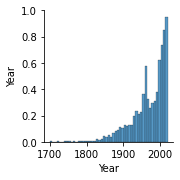

In [143]:
import seaborn as sns

sns.pairplot(data= sharks_df)